In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

convertTime = lambda x : datetime.strptime(x, "%Y/%m/%d - %H:%M:%S").strftime("%Y-%m-%dT%H:%M:%SZ")

In [91]:
acquisitionGPS = pd.read_csv('results/acquisitionsGPS/gps1.csv')
acquisitionTEL = pd.read_csv('results/acquisitionsTELEPHONE/CSV/acquisition1.csv')

In [92]:
acquisitionGPS['UTC'] = acquisitionGPS['UTC'].apply(convertTime)
acquisitionGPS['UTC'] = pd.to_datetime(acquisitionGPS['UTC'])
acquisitionTEL['UTC'] = pd.to_datetime(acquisitionTEL['UTC'])

In [93]:
merged_df = pd.merge_asof(acquisitionGPS.sort_values('UTC'), acquisitionTEL.sort_values('UTC'), on='UTC', suffixes=('_1', '_2')).dropna()
merged_df

,Timestamp,UTC,Latitude_1,Longitude_1,Latitude_2,Longitude_2
47,1.741710e+09,2025-03-11 16:18:44+00:00,49.384321,1.068865,49.384212,1.069393
48,1.741710e+09,2025-03-11 16:18:45+00:00,49.384324,1.068865,49.384212,1.069393
49,1.741710e+09,2025-03-11 16:18:46+00:00,49.384329,1.068865,49.384212,1.069393
50,1.741710e+09,2025-03-11 16:18:47+00:00,49.384333,1.068868,49.384232,1.069253
51,1.741710e+09,2025-03-11 16:18:48+00:00,49.384338,1.068870,49.384237,1.069247
...,...,...,...,...,...,...
493,1.741710e+09,2025-03-11 16:26:53+00:00,49.384899,1.068054,49.384380,1.068232
494,1.741710e+09,2025-03-11 16:26:54+00:00,49.384909,1.068036,49.384370,1.068218
495,1.741710e+09,2025-03-11 16:26:55+00:00,49.384922,1.068017,49.384378,1.068212
496,1.741710e+09,2025-03-11 16:26:56+00:00,49.384934,1.068000,49.384358,1.068197


In [94]:
from geopy.distance import geodesic

def haversine_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).meters

# Calcul de la distance entre chaque point des deux jeux de données
merged_df['distance'] = merged_df.apply(lambda row: haversine_distance(
    row['Latitude_1'], row['Longitude_1'], row['Latitude_2'], row['Longitude_2']
), axis=1)

merged_df.to_csv('traitements/distance_acqui1.csv', index=False)

In [95]:
print(f"Erreur moyenne : {merged_df['distance'].mean():.2f} mètres")
print(f"Erreur max : {merged_df['distance'].max():.2f} mètres")
print(f"Erreur min : {merged_df['distance'].min():.2f} mètres")

merged_df['Latitude_corrigée'] = merged_df[['Latitude_1', 'Latitude_2']].mean(axis=1)
merged_df['Longitude_corrigée'] = merged_df[['Longitude_1', 'Longitude_2']].mean(axis=1)


Erreur moyenne : 19.51 mètres
Erreur max : 68.54 mètres
Erreur min : 0.43 mètres


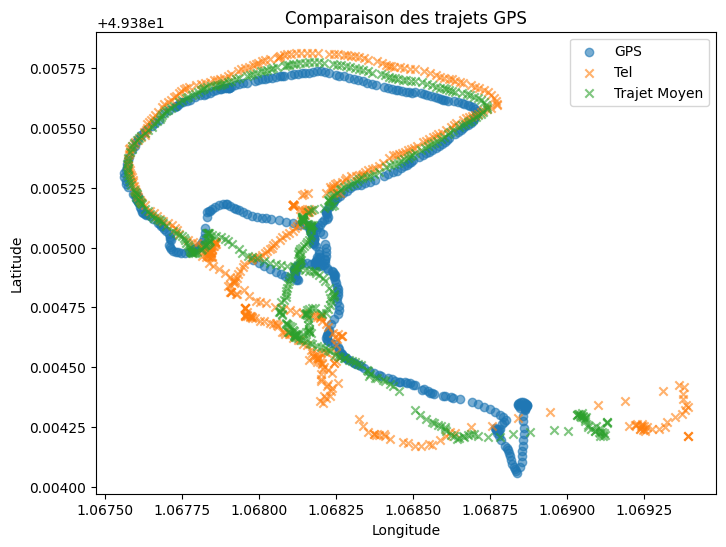

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(merged_df['Longitude_1'], merged_df['Latitude_1'], label='GPS', alpha=0.6)
plt.scatter(merged_df['Longitude_2'], merged_df['Latitude_2'], label='Tel', alpha=0.6, marker='x')
plt.scatter(merged_df['Longitude_corrigée'], merged_df['Latitude_corrigée'], label='Trajet Moyen', alpha=0.6, marker='x')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Comparaison des trajets GPS')
plt.show()


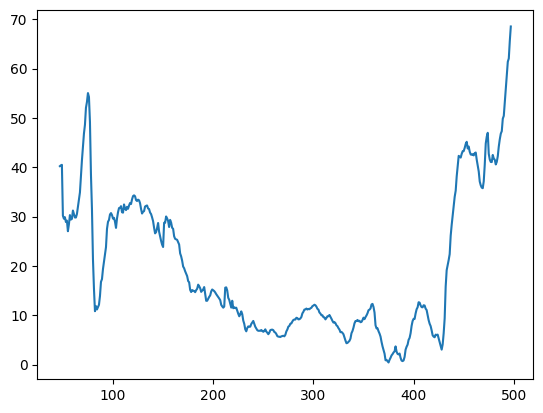

In [97]:
plt.plot(merged_df['distance'])